# SPOTIFY DATASET : 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PROBLEM STATEMENT :

**Context**:
- A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning I like it and "0" for songs I don't like. I used this to data to see if I could build a classifier that could predict whether or not I would like a song.

**Content**:
- Each row represents a song.

- There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song.

- Here are the 13 track attributes: acousticness, danceability, durationms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, timesignature, valence.

url : https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

## IMPORT LIBRARIES : 

In [56]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,recall_score,precision_score

%matplotlib inline


## IMPORT DATASET : 

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Spotify Data.csv")

In [4]:
data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


## EXPLORATORY DATA ANALYSIS: 

### GETTING INSIGHTS OF DATA : 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
data.song_title.value_counts()

River                 3
Jack                  3
Mask Off              2
Be My Baby            2
Oblivion              2
                     ..
L'Amour Parfait       1
I Follow Rivers       1
From Nowhere          1
I Need You            1
I Wanna Get Better    1
Name: song_title, Length: 1956, dtype: int64

In [7]:
data.song_title.unique()

array(['Mask Off', 'Redbone', 'Xanny Family', ...,
       'Habit - Dack Janiels & Wenzday Remix', 'First Contact',
       'I Wanna Get Better'], dtype=object)

In [8]:
data.artist.value_counts()

Drake                16
Rick Ross            13
Disclosure           12
WALK THE MOON        10
Backstreet Boys      10
                     ..
Real Connoisseur      1
Deep Purple           1
Brenton Wood          1
Ultimate Painting     1
Bleachers             1
Name: artist, Length: 1343, dtype: int64

In [9]:
data.artist.unique()

array(['Future', 'Childish Gambino', 'Beach House', ..., 'Rain Man',
       'Twin Moons', 'Bleachers'], dtype=object)

In [10]:
data.target.value_counts()

1    1020
0     997
Name: target, dtype: int64

In [11]:
data.target.unique()

array([1, 0])

### SUMMARY STATISTICS OF DATA : 

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2017.0,1008.000000,582.402066,0.000000,504.00000,1008.000000,1512.000,2016.000
acousticness,2017.0,0.187590,0.259989,0.000003,0.00963,0.063300,0.265,0.995
danceability,2017.0,0.618422,0.161029,0.122000,0.51400,0.631000,0.738,0.984
duration_ms,2017.0,246306.197323,81981.814219,16042.000000,200015.00000,229261.000000,270333.000,1004627.000
energy,2017.0,0.681577,0.210273,0.014800,0.56300,0.715000,0.846,0.998
instrumentalness,2017.0,0.133286,0.273162,0.000000,0.00000,0.000076,0.054,0.976
key,2017.0,5.342588,3.648240,0.000000,2.00000,6.000000,9.000,11.000
liveness,2017.0,0.190844,0.155453,0.018800,0.09230,0.127000,0.247,0.969
loudness,2017.0,-7.085624,3.761684,-33.097000,-8.39400,-6.248000,-4.746,-0.307
mode,2017.0,0.612295,0.487347,0.000000,0.00000,1.000000,1.000,1.000


### CHECKING NULL VALUES OF DATA : 

In [13]:
data.isna().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

### CHECKING DUPLICATE VALUES OF DATA : 

In [14]:
data.duplicated().sum()

0

### DATA PREPPROCESSING AND VISUALIZATION : 

#### SPLITTING FEATURE DATA AND TARGET DATA : 

- Since the columns [song_title, artist] are containg huge number of object characters, They cannot be categorized. So I would like to drop those two columns.

**FEATURE DATA :**

In [15]:
X_data = data.iloc[:, :-3]

In [16]:
X_data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623


In [17]:
X_data.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [18]:
features = ['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']

**TARGET DATA :**

In [19]:
Y_data = data.iloc[:, -3]

In [20]:
Y_data

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

#### VISUALIZATIONS : 

**FEATURE DATA :**

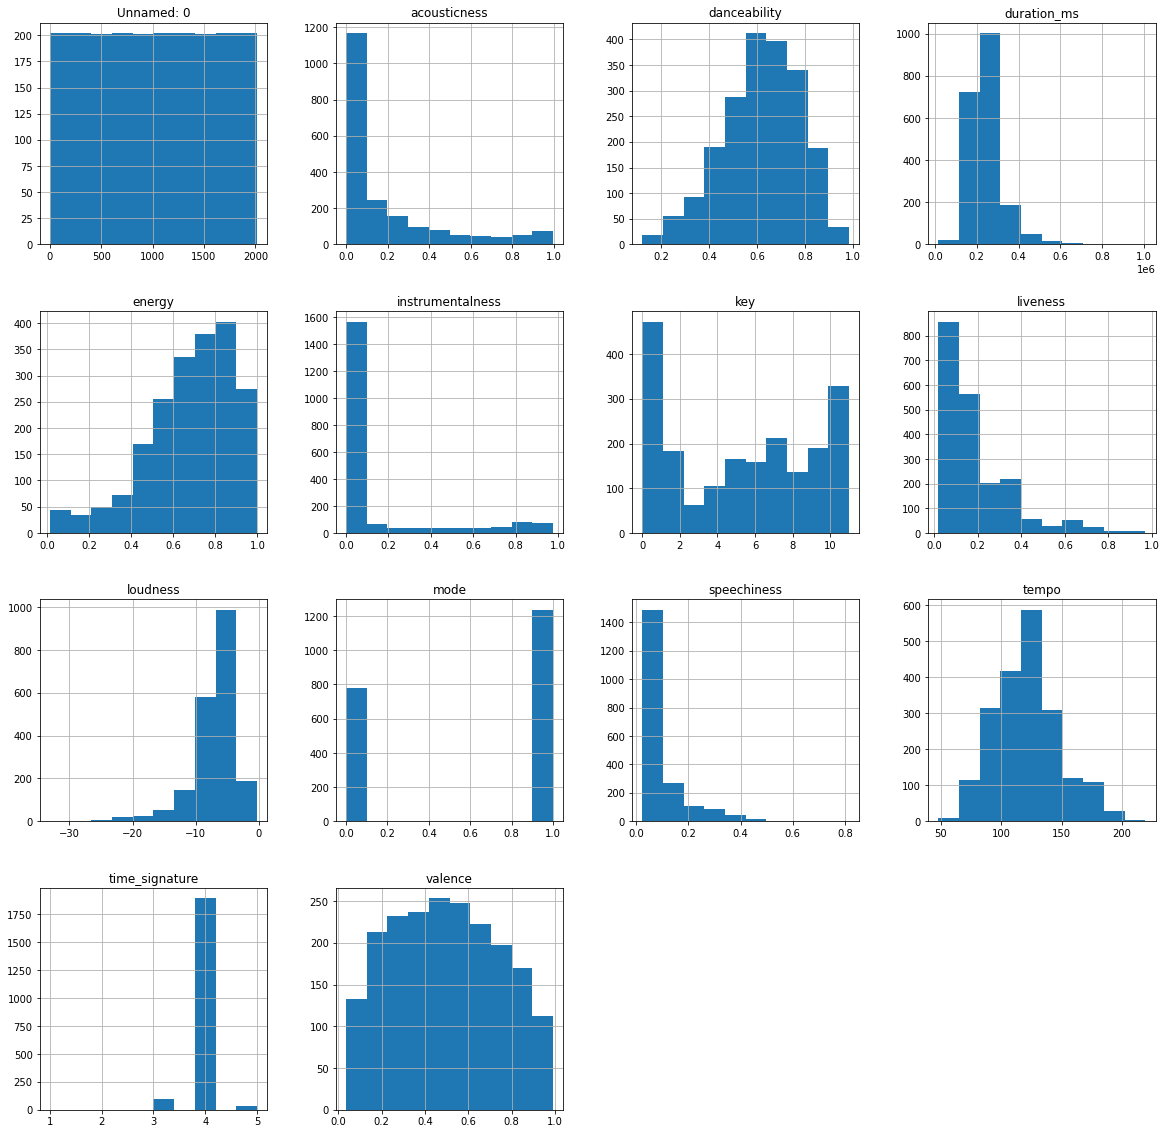

In [21]:
X_data.hist(figsize=(20, 20));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


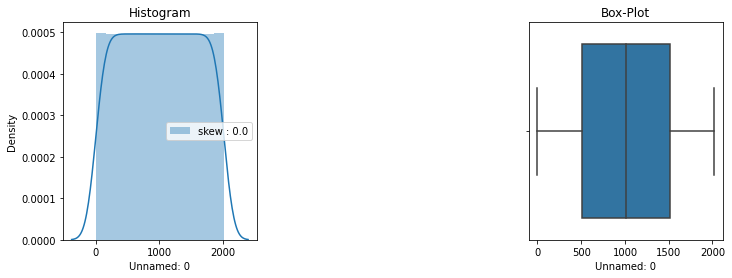

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


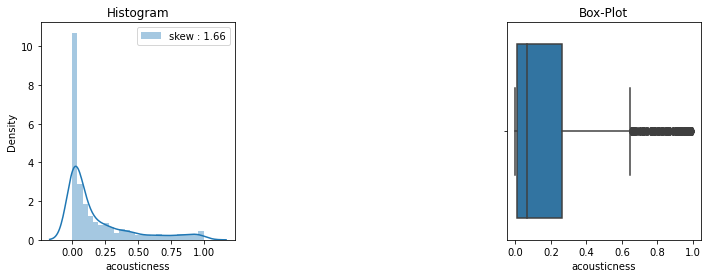

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


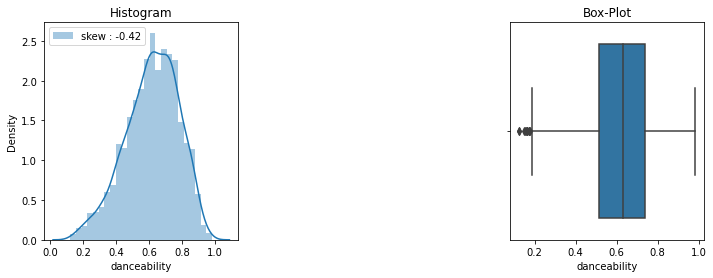

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


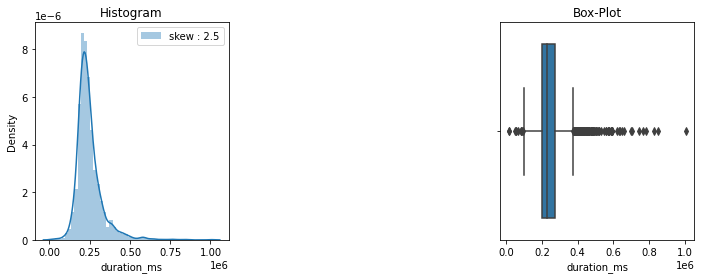

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


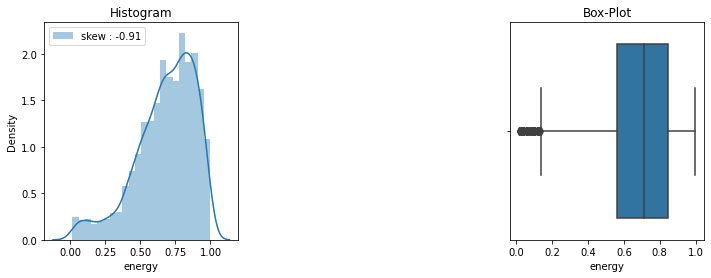

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


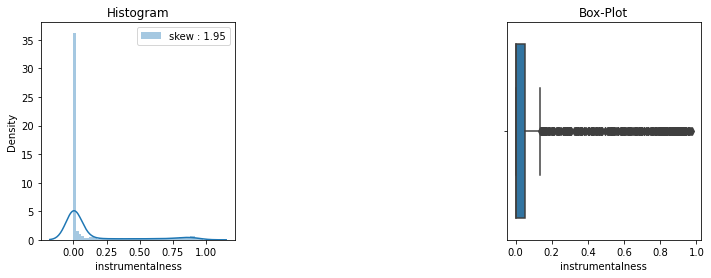

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


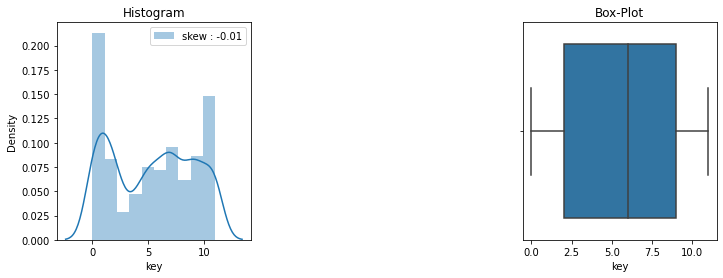

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


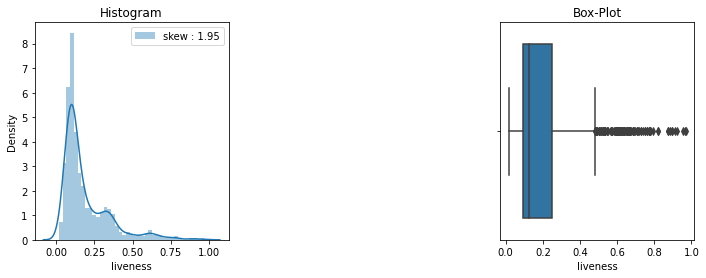

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


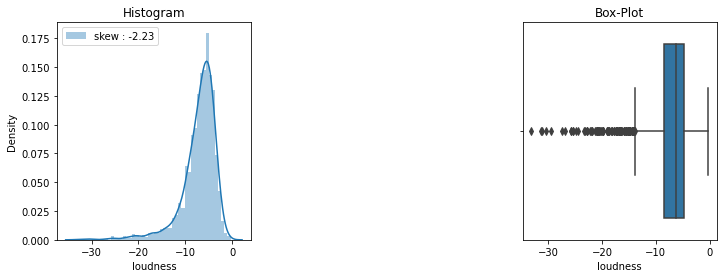

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


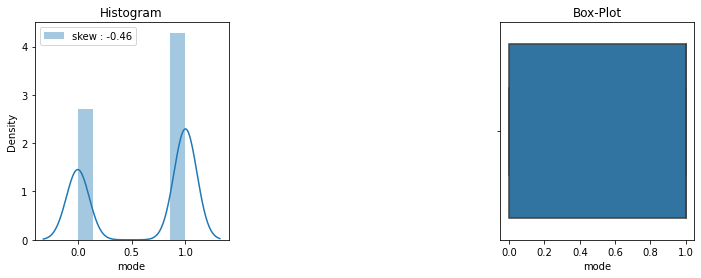

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


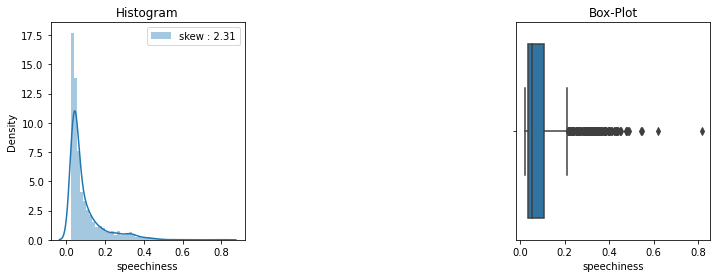

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


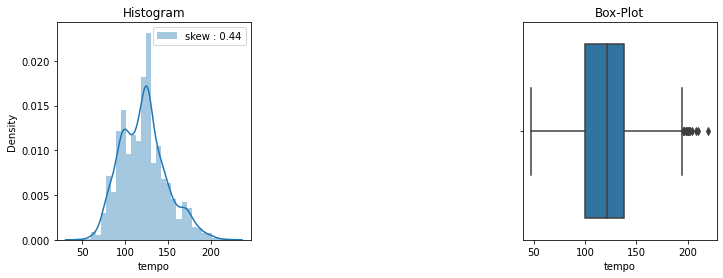

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


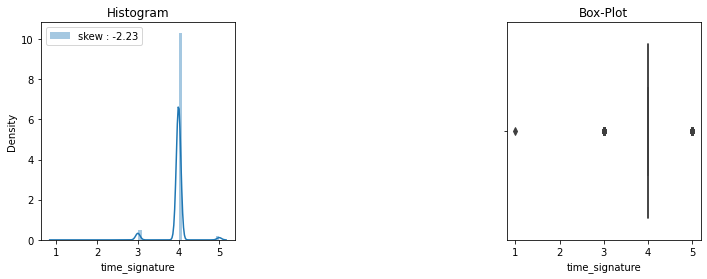

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


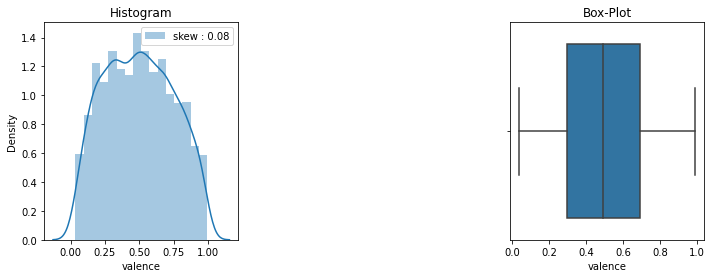

In [22]:
for col in features:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(X_data[col], label = "skew : " + str(np.round(X_data[col].skew(),2)))
    plt.title('Histogram')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(X_data[col])
    plt.title('Box-Plot')
    plt.show()

**TARGET DATA:**

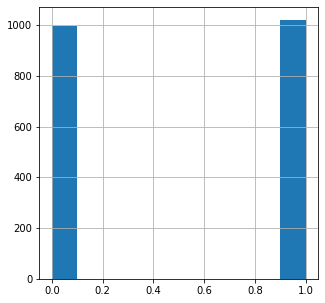

In [23]:
Y_data.hist(figsize=(5, 5));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box-Plot')

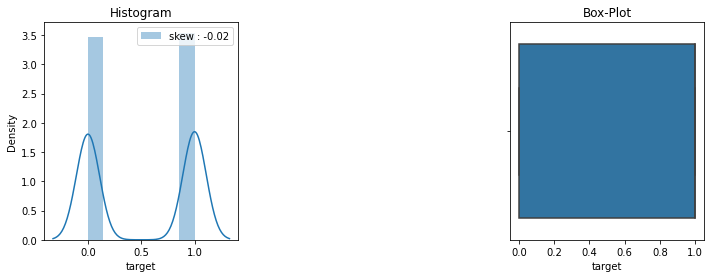

In [24]:
plt.figure(figsize=(16,4))

plt.subplot(141)
sns.distplot(Y_data, label = "skew : " + str(np.round(Y_data.skew(),2)))
plt.title('Histogram')
plt.legend()

plt.subplot(143)
sns.boxplot(Y_data)
plt.title('Box-Plot')

- As **Y_data** is categorical there is nothing to get through Visualization.

#### TREATING OUTLIERS : 

**FEATURE DATA :**

In [25]:
X_cap_data = X_data.copy()

In [26]:
def no_outlier(df, fets, factor):
  for fet in fets:
    q_25 = df[fet].quantile(0.25)
    q_75 = df[fet].quantile(0.75)
    q_10 = df[fet].quantile(0.10)
    q_90 = df[fet].quantile(0.90)

    iqr = q_75 - q_25

    upper_bound = q_75 + (factor * iqr)
    lower_bound = q_25 - (factor * iqr)

    df[fet] = np.where(df[fet]>upper_bound, upper_bound,
                  np.where(df[fet]<lower_bound, lower_bound, df[fet]))
    


In [27]:
no_outlier(X_cap_data, features, 1.5)

**VISUALIZATION :**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

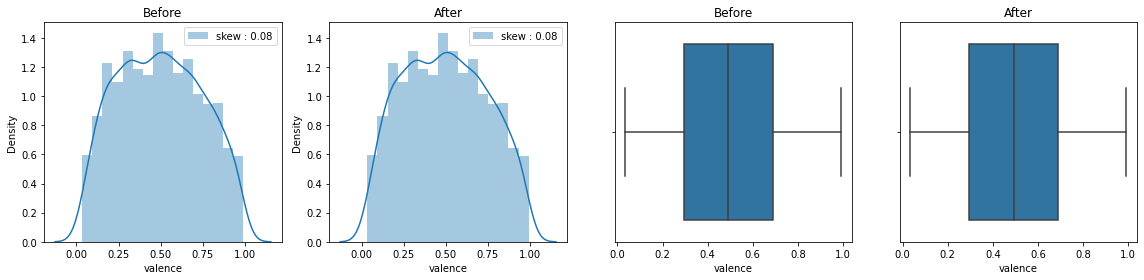

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

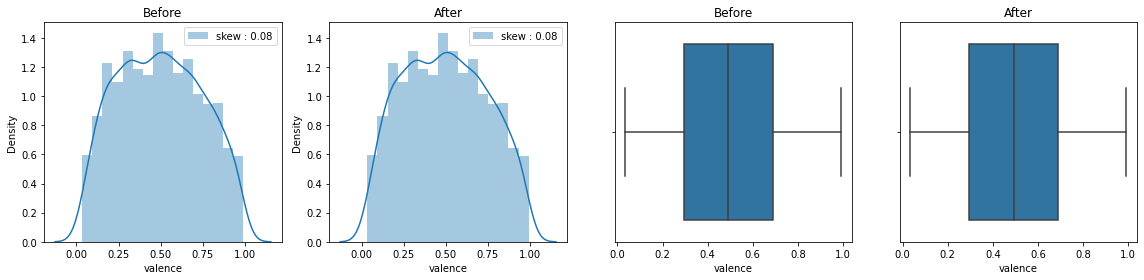

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

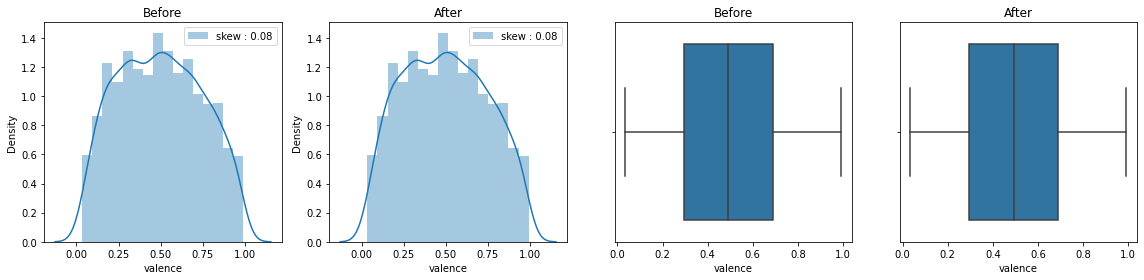

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

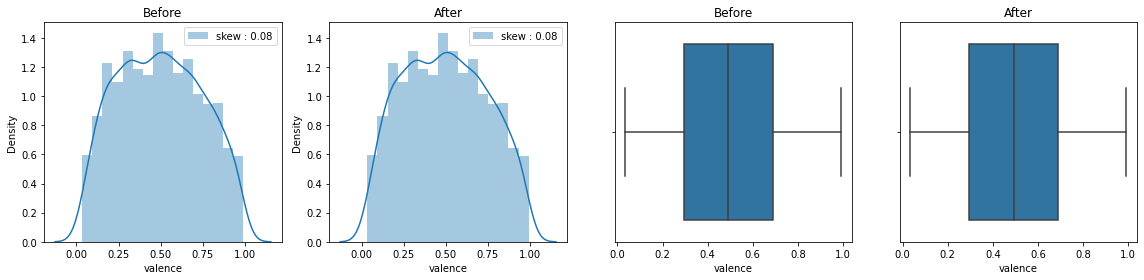

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

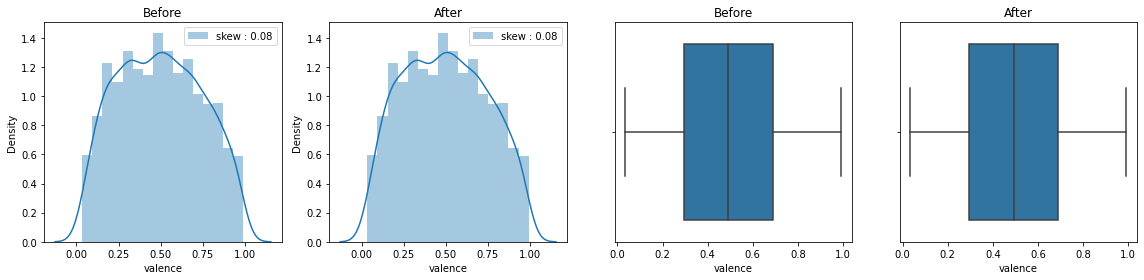

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

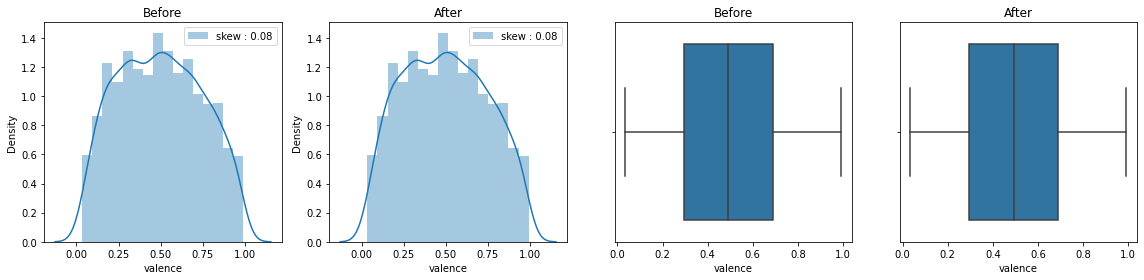

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

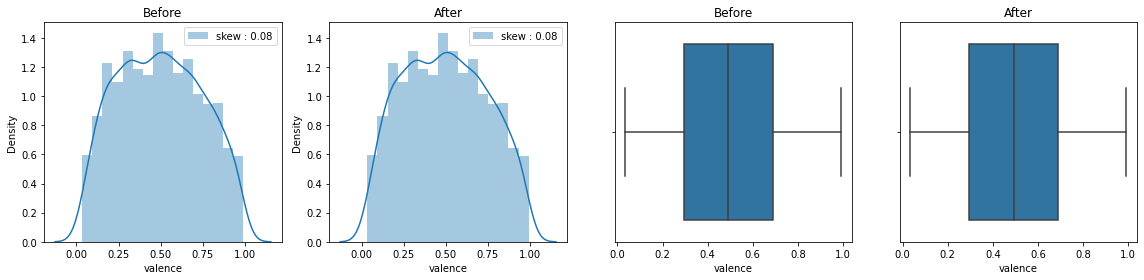

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

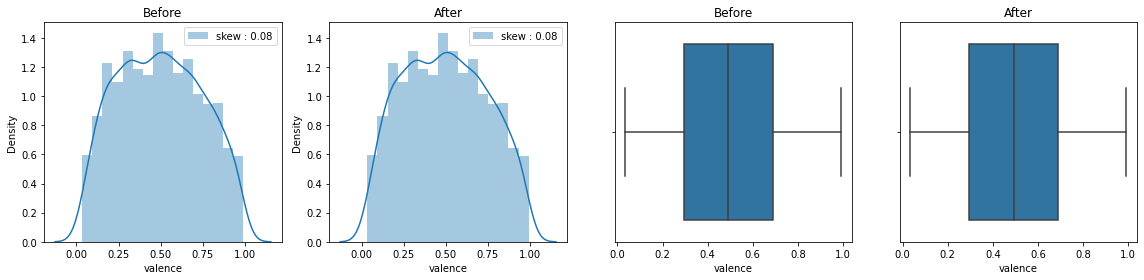

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

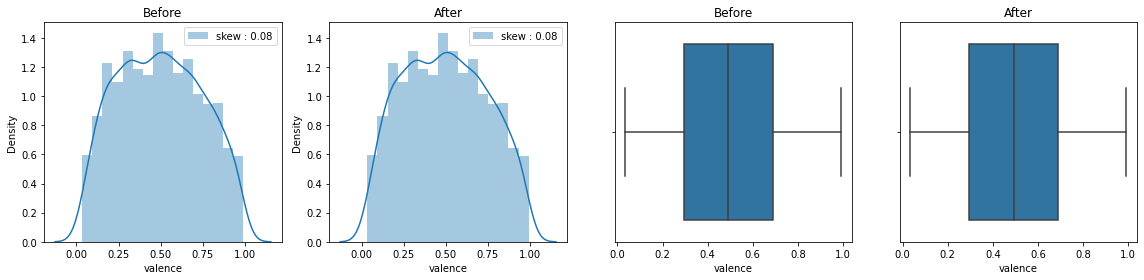

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

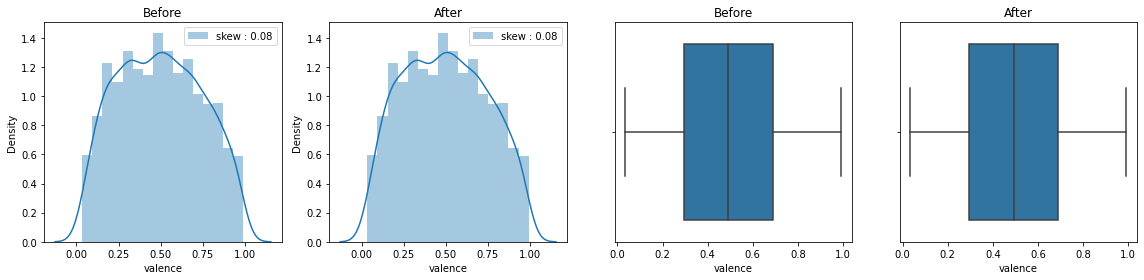

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

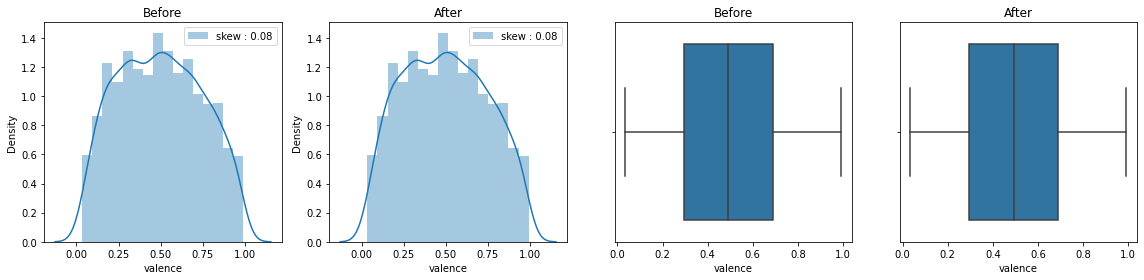

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

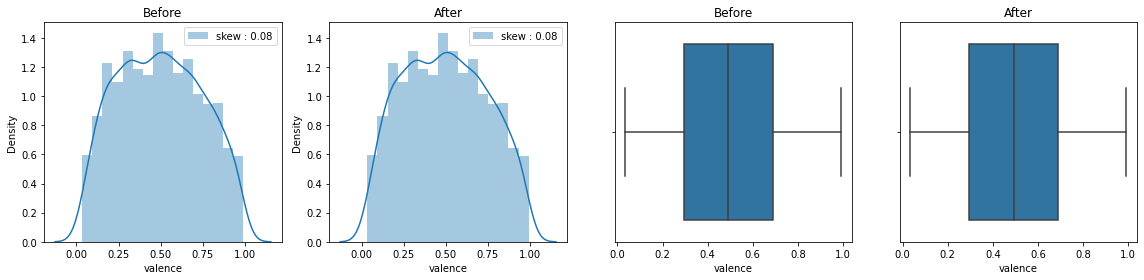

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

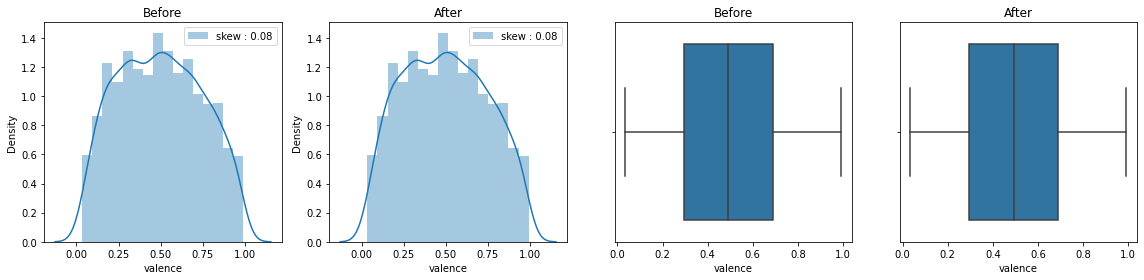

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

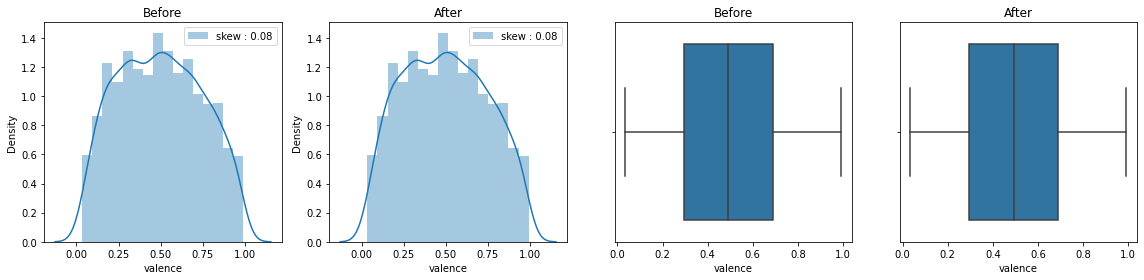

In [28]:
for fet in features:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(X_data[col], label = "skew : " + str(np.round(X_data[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(X_cap_data[col], label = "skew : " + str(np.round(X_cap_data[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(X_data[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(X_cap_data[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [29]:
X_cap_data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0,0.01020,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.21375,150.062,4.0,0.286
1,1.0,0.19900,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.07940,160.083,4.0,0.588
2,2.0,0.03440,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.21375,75.044,4.0,0.173
3,3.0,0.60400,0.494,199413.0,0.338,0.135000,5.0,0.0922,-13.866,1.0,0.02610,86.468,4.0,0.230
4,4.0,0.18000,0.678,375810.0,0.561,0.135000,5.0,0.4390,-11.648,0.0,0.06940,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012.0,0.00106,0.584,274404.0,0.932,0.002690,1.0,0.1290,-3.501,1.0,0.21375,74.976,4.0,0.211
2013,2013.0,0.08770,0.894,182182.0,0.892,0.001670,1.0,0.0528,-2.663,1.0,0.13100,110.041,4.0,0.867
2014,2014.0,0.00857,0.637,207200.0,0.935,0.003990,0.0,0.2140,-2.467,1.0,0.10700,150.082,4.0,0.470
2015,2015.0,0.00164,0.557,185600.0,0.992,0.135000,1.0,0.0913,-2.735,1.0,0.13300,150.011,4.0,0.623


#### TREATING SKEW : 

**FEATURE DATA :**

In [30]:
skew_limit = 0.75
skew_vals = X_cap_data.skew()

In [31]:
skew_vals 

Unnamed: 0          0.000000
acousticness        1.257053
danceability       -0.405558
duration_ms         0.633487
energy             -0.797054
instrumentalness    1.187049
key                -0.009360
liveness            1.150560
loudness           -0.790777
mode               -0.461301
speechiness         1.201661
tempo               0.397930
time_signature      0.000000
valence             0.078390
dtype: float64

In [32]:
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending = False)

In [33]:
skew_cols

acousticness        1.257053
speechiness         1.201661
instrumentalness    1.187049
liveness            1.150560
loudness           -0.790777
energy             -0.797054
dtype: float64

In [35]:
for col in skew_cols.index.values:
  if col  == 'loudness':
    continue
  X_cap_data[col] = X_cap_data[col].apply(np.log1p)

In [36]:
X_cap_data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0,0.010148,0.833,204600.0,0.360468,0.021664,2.0,0.152721,-8.795,1.0,0.193715,150.062,4.0,0.286
1,1.0,0.181488,0.743,326933.0,0.306749,0.006091,1.0,0.128393,-10.401,1.0,0.076405,160.083,4.0,0.588
2,2.0,0.033822,0.838,185707.0,0.345007,0.000234,2.0,0.147558,-7.148,1.0,0.193715,75.044,4.0,0.173
3,3.0,0.472501,0.494,199413.0,0.291176,0.126633,5.0,0.088194,-13.866,1.0,0.025765,86.468,4.0,0.230
4,4.0,0.165514,0.678,375810.0,0.445327,0.126633,5.0,0.363948,-11.648,0.0,0.067098,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012.0,0.001059,0.584,274404.0,0.658556,0.002686,1.0,0.121332,-3.501,1.0,0.193715,74.976,4.0,0.211
2013,2013.0,0.084065,0.894,182182.0,0.637634,0.001669,1.0,0.051453,-2.663,1.0,0.123102,110.041,4.0,0.867
2014,2014.0,0.008533,0.637,207200.0,0.660107,0.003982,0.0,0.193921,-2.467,1.0,0.101654,150.082,4.0,0.470
2015,2015.0,0.001639,0.557,185600.0,0.689139,0.126633,1.0,0.087370,-2.735,1.0,0.124869,150.011,4.0,0.623


In [37]:
X = X_cap_data.copy()

In [38]:
X

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0,0.010148,0.833,204600.0,0.360468,0.021664,2.0,0.152721,-8.795,1.0,0.193715,150.062,4.0,0.286
1,1.0,0.181488,0.743,326933.0,0.306749,0.006091,1.0,0.128393,-10.401,1.0,0.076405,160.083,4.0,0.588
2,2.0,0.033822,0.838,185707.0,0.345007,0.000234,2.0,0.147558,-7.148,1.0,0.193715,75.044,4.0,0.173
3,3.0,0.472501,0.494,199413.0,0.291176,0.126633,5.0,0.088194,-13.866,1.0,0.025765,86.468,4.0,0.230
4,4.0,0.165514,0.678,375810.0,0.445327,0.126633,5.0,0.363948,-11.648,0.0,0.067098,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012.0,0.001059,0.584,274404.0,0.658556,0.002686,1.0,0.121332,-3.501,1.0,0.193715,74.976,4.0,0.211
2013,2013.0,0.084065,0.894,182182.0,0.637634,0.001669,1.0,0.051453,-2.663,1.0,0.123102,110.041,4.0,0.867
2014,2014.0,0.008533,0.637,207200.0,0.660107,0.003982,0.0,0.193921,-2.467,1.0,0.101654,150.082,4.0,0.470
2015,2015.0,0.001639,0.557,185600.0,0.689139,0.126633,1.0,0.087370,-2.735,1.0,0.124869,150.011,4.0,0.623


In [47]:
X.shape

(2017, 14)

**TARGET DATA :**

In [40]:
Y = Y_data.copy()

In [41]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

In [46]:
Y.shape

(2017,)

#### CORRELATION HEAT-MAP : 

AxesSubplot(0.125,0.125;0.62x0.755)


(14.5, -0.5)

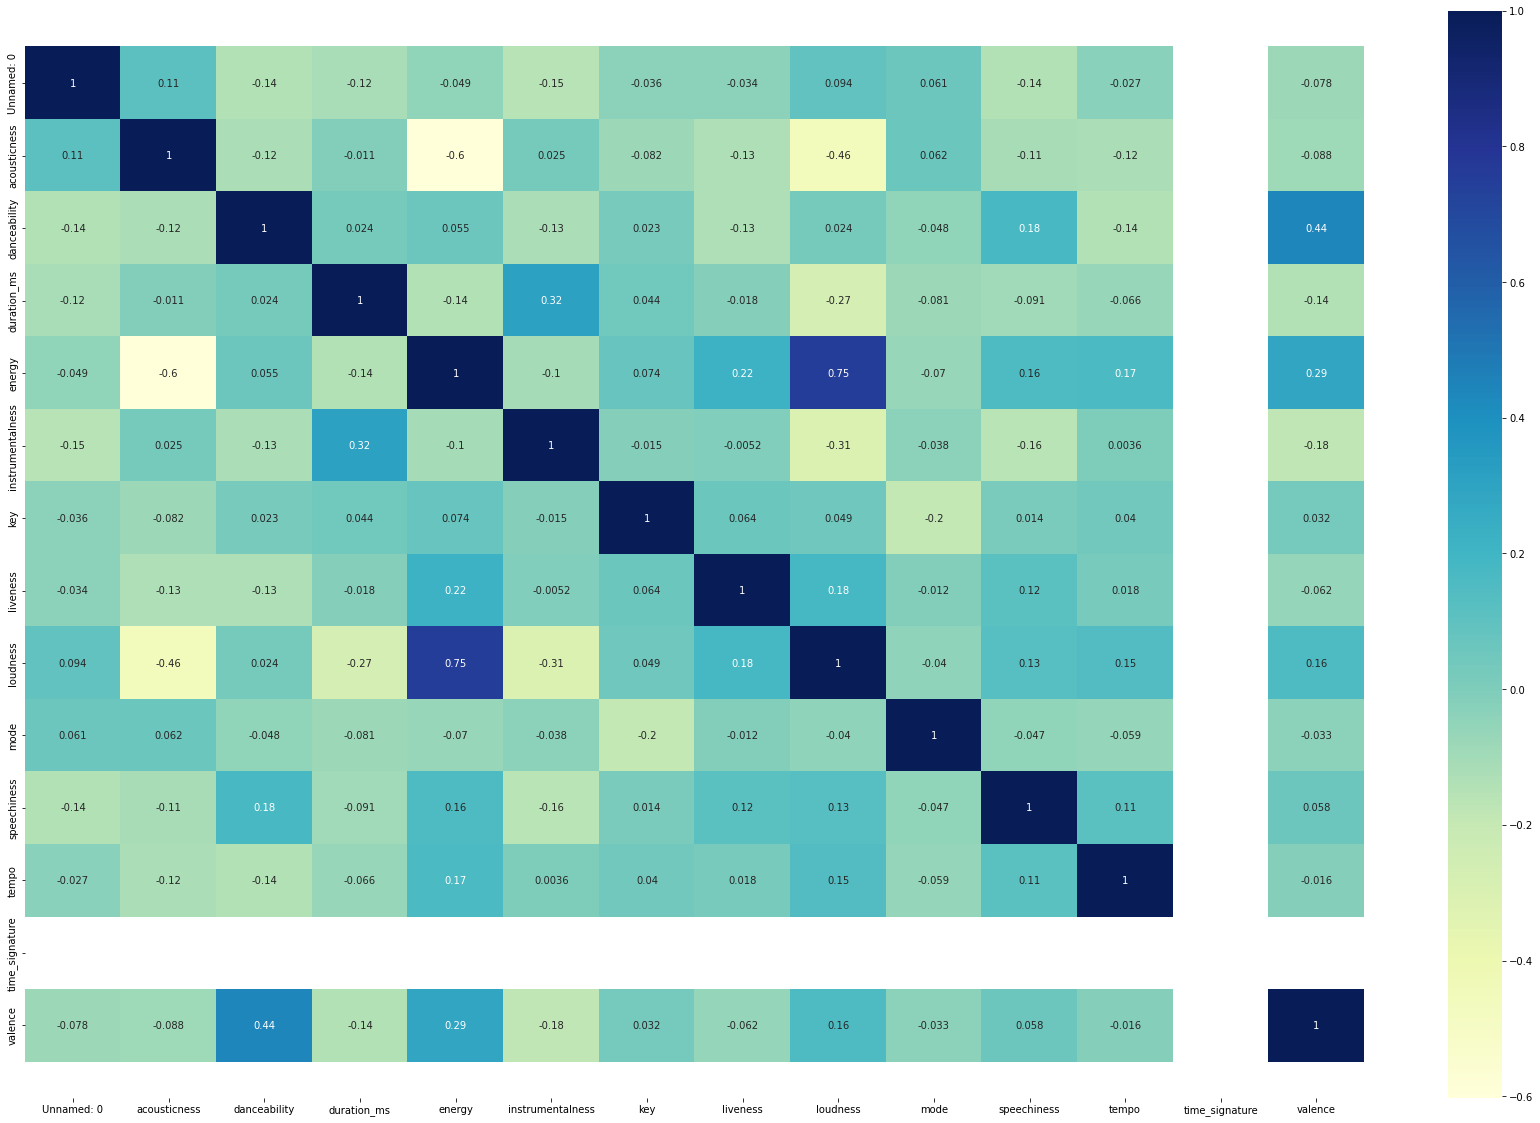

In [49]:
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = X.corr(),cmap='YlGnBu',annot=True)
print(ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

In [51]:
X.drop("loudness", axis = 1, inplace = True)

In [52]:
X

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
0,0.0,0.010148,0.833,204600.0,0.360468,0.021664,2.0,0.152721,1.0,0.193715,150.062,4.0,0.286
1,1.0,0.181488,0.743,326933.0,0.306749,0.006091,1.0,0.128393,1.0,0.076405,160.083,4.0,0.588
2,2.0,0.033822,0.838,185707.0,0.345007,0.000234,2.0,0.147558,1.0,0.193715,75.044,4.0,0.173
3,3.0,0.472501,0.494,199413.0,0.291176,0.126633,5.0,0.088194,1.0,0.025765,86.468,4.0,0.230
4,4.0,0.165514,0.678,375810.0,0.445327,0.126633,5.0,0.363948,0.0,0.067098,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012.0,0.001059,0.584,274404.0,0.658556,0.002686,1.0,0.121332,1.0,0.193715,74.976,4.0,0.211
2013,2013.0,0.084065,0.894,182182.0,0.637634,0.001669,1.0,0.051453,1.0,0.123102,110.041,4.0,0.867
2014,2014.0,0.008533,0.637,207200.0,0.660107,0.003982,0.0,0.193921,1.0,0.101654,150.082,4.0,0.470
2015,2015.0,0.001639,0.557,185600.0,0.689139,0.126633,1.0,0.087370,1.0,0.124869,150.011,4.0,0.623


#### TRAIN-TEST SPLIT : 

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [55]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (1411, 13)
Number transactions Y_train dataset:  (1411,)
Number transactions X_test dataset:  (606, 13)
Number transactions Y_test dataset:  (606,)


## MODEL BUILDING : 

### DECISION TREE :

#### MODEL IMPORT :

In [65]:

from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit(X_train,Y_train)


DecisionTreeClassifier()

#### TRAINING ACCURACY :

In [66]:

train_prediction = decision.predict(X_train)
train_acc_tree = accuracy_score(train_prediction,Y_train)
print('Accuracy on DecisionTree training data : ',train_acc_tree)


Accuracy on DecisionTree training data :  1.0


#### TEST ACCURACY : 

In [67]:

test_prediction = decision.predict(X_test)
test_acc_tree = accuracy_score(test_prediction,Y_test)
print('\nAccuracy on DecisionTree test data : ',test_acc_tree)



Accuracy on DecisionTree test data :  1.0


#### RECALL AND PRECESION SCORE :

In [68]:

recall_tree = recall_score(test_prediction,Y_test)
precision_tree = precision_score(test_prediction, Y_test)
print('Recall score on DecisionTree test data : ',recall_tree)
print('Precision score on DecisionTree test data : ',precision_tree)


Recall score on DecisionTree test data :  1.0
Precision score on DecisionTree test data :  1.0


### LOGISTICS REGRESSION : 

#### MODEL IMPORT :

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

#### TRAINING ACCURACY :

In [70]:

X_train_prediction = model.predict(X_train)
train_acc_log = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on training data : ',train_acc_log)


Accuracy on training data :  0.9914953933380581


#### TEST ACCURACY : 

In [71]:

X_test_prediction = model.predict(X_test)
test_acc_log = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data : ',test_acc_log)


Accuracy on test data :  0.9933993399339934


#### RECALL AND PRECESION SCORE :

In [72]:

recall_log = recall_score(X_test_prediction, Y_test)
precision_log = precision_score(X_test_prediction, Y_test)
print('Recall score on LogisticReg test data : ',recall_log)
print('Precision score on LogisticReg test data : ',precision_log)


Recall score on LogisticReg test data :  1.0
Precision score on LogisticReg test data :  0.9870967741935484


### K-NEAREST NEIGHBOUR : 

#### MODEL IMPORT :

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

#### TRAINING ACCURACY :

In [74]:

train_prediction = knn.predict(X_train)
train_acc_KNN = accuracy_score(train_prediction,Y_train)

print('Accuracy on KNN training data : ',train_acc_KNN)


Accuracy on KNN training data :  0.9383416017009213


#### TEST ACCURACY : 

In [75]:

test_prediction = knn.predict(X_test)
test_acc_KNN = accuracy_score(test_prediction,Y_test)

print('Accuracy on KNN test data : ',test_acc_KNN)


Accuracy on KNN test data :  0.8943894389438944


#### RECALL AND PRECESION SCORE :

In [76]:

recall_KNN = recall_score(test_prediction, Y_test)
precision_KNN = precision_score(test_prediction, Y_test)
print('Recall score on KNN test data : ',recall_KNN)
print('Precision score on KNN test data : ',precision_KNN)


Recall score on KNN test data :  0.8942307692307693
Precision score on KNN test data :  0.9


## MODEL EVALUATION : 

In [80]:

Models = ['Logistic Regression','KNN','Decision Tree']
train_accuracy = [train_acc_log,train_acc_KNN,train_acc_tree]
test_accuracy = [test_acc_log,test_acc_KNN,test_acc_tree]
recall_score = [recall_log,recall_KNN,recall_tree]
precision_score = [precision_log,precision_KNN,precision_tree]


In [81]:

score = {'Model': Models, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Recall Score':recall_score,'Precision Score':precision_score}
df3 = pd.DataFrame(score)
df3


,Model,Train Accuracy,Test Accuracy,Recall Score,Precision Score
0,Logistic Regression,0.991495,0.993399,1.000000,0.987097
1,KNN,0.938342,0.894389,0.894231,0.900000
2,Decision Tree,1.000000,1.000000,1.000000,1.000000
